In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [61]:
import warnings
warnings.filterwarnings('ignore')

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [27]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t' )

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [25]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


## 1. Вывести количество наблюдений в датасете.

In [15]:
data.shape[0]

4622

## 2. Вывести названия столбцов.

In [23]:
list(data.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

## 3. Определить самую частую позицию в заказе.

In [39]:
data['item_name'].value_counts().index[0]

'Chicken Bowl'

## 4. Построить гистрограмму частоты заказов по позициям.

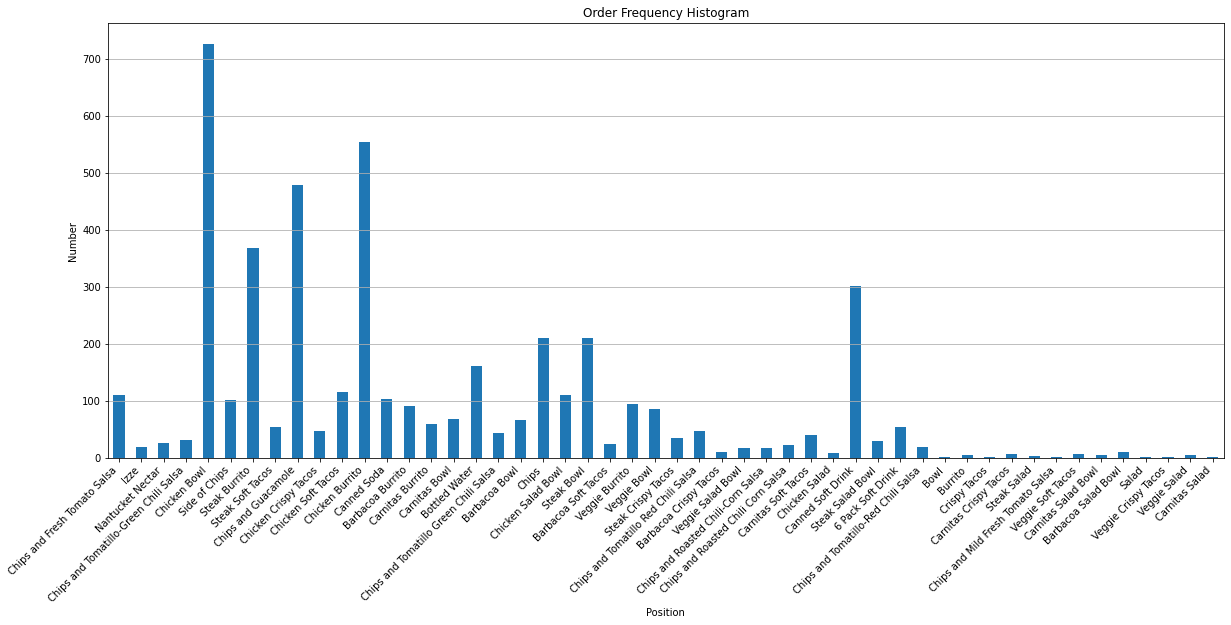

In [31]:
each_item_number = Counter(data.item_name)
each_item_number = pd.DataFrame.from_dict(each_item_number, orient='index')

each_item_number.plot(kind='bar', figsize=(20, 8), legend=False)
plt.xlabel('Position')
plt.ylabel('Number')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.title('Order Frequency Histogram')
plt.show()

## 5. Изменить тип переменной item_price c помощью лямбды функции.

In [28]:
data['item_price'] = data.apply(lambda x: float(x['item_price'].replace('$', '')), axis=1)

## 6. Построить гистограмму количества денег заработанных по каждой позиции.

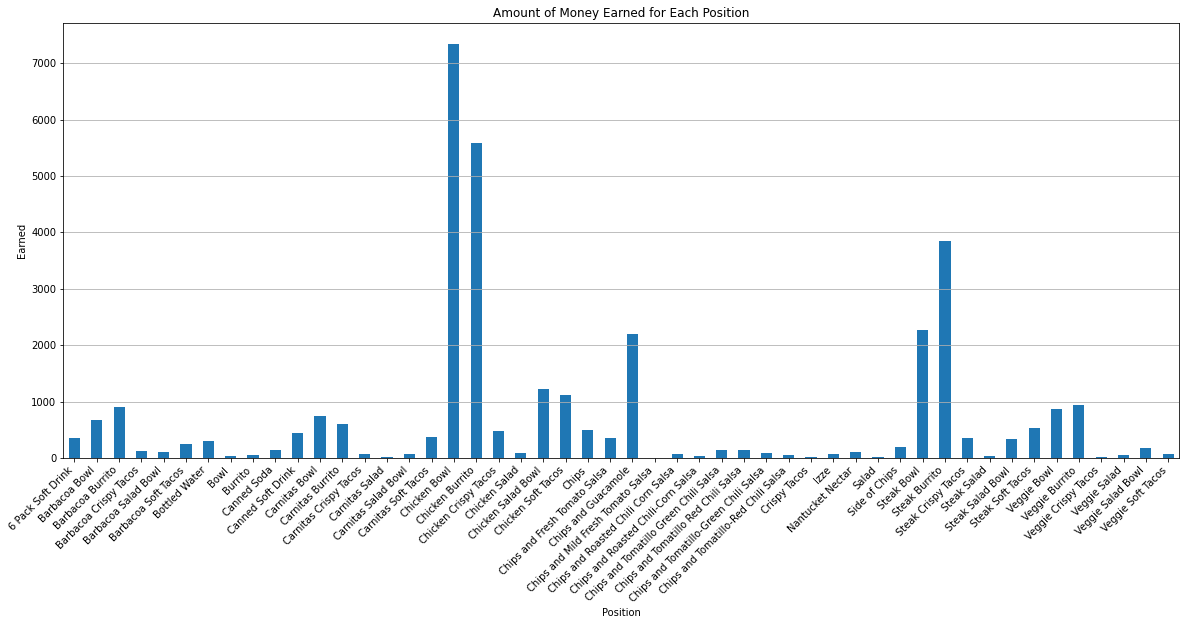

In [34]:
each_item_sum = data[['item_name', 'item_price']]
each_item_sum = each_item_sum.groupby('item_name').sum()

each_item_sum.plot(kind='bar', figsize=(20, 8), legend=False)
plt.xlabel('Position')
plt.ylabel('Earned')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.title('Amount of Money Earned for Each Position')
plt.show()

## 7. Посчитать среднюю сумма заказа.

In [39]:
average_order_amount = round(data.item_price.sum() / data.order_id.nunique(), 2)
average_order_amount

18.81

In [40]:
average_order_amount = round(data.groupby('order_id', sort=False).item_price.sum().mean(), 2)
average_order_amount

18.81

## 8. Вывести среднее, минимальное, максимальное и медианное значение позиций в заказе.

In [46]:
grouped = data.groupby('order_id', sort=False).item_name.nunique().reset_index()
grouped.agg({'item_name': ['mean', 'min', 'max', 'median']})

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


## 9. Определить статистику заказов стейков, а также статистику заказов прожарки.

In [62]:
steaks = data.loc[data['item_name'].str.contains('Steak')]
steaks.groupby('item_name')['quantity', 'item_price'].describe()

quantity                                               \
                      count      mean       std  min  25%  50%  75%  max   
item_name                                                                  
Steak Bowl            211.0  1.047393  0.234278  1.0  1.0  1.0  1.0  3.0   
Steak Burrito         368.0  1.048913  0.239889  1.0  1.0  1.0  1.0  3.0   
Steak Crispy Tacos     35.0  1.028571  0.169031  1.0  1.0  1.0  1.0  2.0   
Steak Salad             4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
Steak Salad Bowl       29.0  1.068966  0.257881  1.0  1.0  1.0  1.0  2.0   
Steak Soft Tacos       55.0  1.018182  0.134840  1.0  1.0  1.0  1.0  2.0   

                   item_price                                                  \
                        count       mean       std   min    25%    50%    75%   
item_name                                                                       
Steak Bowl              211.0  10.711801  2.672417  8.69  9.250   9.25  11.75   
Steak Burrito           368.0  10.465842  2.571981  8.69  8.990   9.25  11.75   
Steak Crispy Tacos       35.0  10.209714  1.827732  8.69  9.120   9.25  11.75   
Steak Salad               4.0   8.915000  0.150000  8.69  8.915   8.99   8.99   
Steak Salad Bowl         29.0  11.847931  3.511170  9.39  9.390  11.89  11.89   
Steak Soft Tacos         55.0   9.746364  1.523743  8.99  9.120   9.25   9.25   

                           
                      max  
item_name                  
Steak Bowl          26.07  
Steak Burrito       27.75  
Steak Crispy Tacos  17.98  
Steak Salad          8.99  
Steak Salad Bowl    23.78  
Steak Soft Tacos    18.50

## 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [63]:
USD_COURSE = 73.52
data['item_price_rub'] = round(data.item_price * USD_COURSE, 2)
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,175.71
1,1,1,Izze,[Clementine],3.39,249.23
2,1,1,Nantucket Nectar,[Apple],3.39,249.23
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,175.71
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1248.37


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.